In this notebook, the final figure is created. It is dependence of frequency on the $\mathcal{E}_{\rm dd}$ parameter

# import modules

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:

fx = 18.5 # Hz
wx = 2*np.pi*fx
wx = 1.263E-04 # https://www.wolframalpha.com/input/?i=2*pi*18.5Hz+%2F+%28hbar+%2F+%28%28162+atomic+mass+unit%29+*+%28390+bohr+radius%29%5E2%29%29


mf_frequencies = pd.DataFrame(
    [
        
        {"eps_dd": 1.38, "path": "../reproduce-mflhy-theory/eps-dd=1.38/3-estimate-freqs/small-box-large-dx-4/3-analyze-frequency/frequencies.txt", "theory": "MFLHY", "label": "small-box-large-dx-4"},
        {"eps_dd": 1.38, "path": "../reproduce-mflhy-theory/eps-dd=1.38/3-estimate-freqs/large-box-large-dx-4/3-analyze-frequency/frequencies.txt", "theory": "MFLHY", "label": "large-box-large-dx-4"},
        {"eps_dd": 1.38, "path": "../reproduce-mflhy-theory/eps-dd=1.38/3-estimate-freqs/small-box-small-dx-4/3-analyze-frequency/frequencies.txt", "theory": "MFLHY", "label": "small-box-small-dx-4"},
        
        # {"eps_dd": 1.42, "path": "../reproduce-mflhy-theory/eps-dd=1.42/estimate-freqs/small-box-large-dx-4/3-analyze-frequency/frequencies.txt", "theory": "MFLHY", "label": "small-box-large-dx-4"},
        {"eps_dd": 1.42, "path": "../reproduce-mflhy-theory/eps-dd=1.42/estimate-freqs/large-box-large-dx-4/3-analyze-frequency/frequencies.txt", "theory": "MFLHY", "label": "large-box-large-dx-4"},
        {"eps_dd": 1.42, "path": "../reproduce-mflhy-theory/eps-dd=1.42/estimate-freqs/small-box-small-dx-4/3-analyze-frequency/frequencies.txt", "theory": "MFLHY", "label": "small-box-small-dx-4"},

        {"eps_dd": 1.44, "path": "../reproduce-mflhy-theory/eps-dd=1.44/estimate-freqs/small-box-large-dx-4/3-analyze-frequency/frequencies.txt", "theory": "MFLHY", "label": "small-box-large-dx-4"},
        {"eps_dd": 1.44, "path": "../reproduce-mflhy-theory/eps-dd=1.44/estimate-freqs/large-box-large-dx-4/3-analyze-frequency/frequencies.txt", "theory": "MFLHY", "label": "large-box-large-dx-4"},
        {"eps_dd": 1.44, "path": "../reproduce-mflhy-theory/eps-dd=1.44/estimate-freqs/small-box-small-dx-4/3-analyze-frequency/frequencies.txt", "theory": "MFLHY", "label": "small-box-small-dx-4"},


    ])

def get_freqs(path):
    freqs = np.loadtxt(path)
    sf_freq = np.min(freqs)
    lattice_freq = np.max(freqs)
    return sf_freq/wx, lattice_freq/wx




# Create columns sf_freq and lattice_freq
mf_frequencies["sf_freq"], mf_frequencies["lattice_freq"] = zip(*mf_frequencies["path"].map(get_freqs))
mf_frequencies


,eps_dd,path,theory,label,sf_freq,lattice_freq
0,1.38,../reproduce-mflhy-theory/eps-dd=1.38/3-estima...,MFLHY,small-box-large-dx-4,1.068828,1.727695
1,1.38,../reproduce-mflhy-theory/eps-dd=1.38/3-estima...,MFLHY,large-box-large-dx-4,1.039641,1.689416
2,1.38,../reproduce-mflhy-theory/eps-dd=1.38/3-estima...,MFLHY,small-box-small-dx-4,1.122869,1.621922
3,1.42,../reproduce-mflhy-theory/eps-dd=1.42/estimate...,MFLHY,large-box-large-dx-4,0.796735,1.593469
4,1.42,../reproduce-mflhy-theory/eps-dd=1.42/estimate...,MFLHY,small-box-small-dx-4,0.761451,1.649810
5,1.44,../reproduce-mflhy-theory/eps-dd=1.44/estimate...,MFLHY,small-box-large-dx-4,0.596273,1.890623
6,1.44,../reproduce-mflhy-theory/eps-dd=1.44/estimate...,MFLHY,large-box-large-dx-4,0.682659,1.365318
7,1.44,../reproduce-mflhy-theory/eps-dd=1.44/estimate...,MFLHY,small-box-small-dx-4,0.653325,1.698646


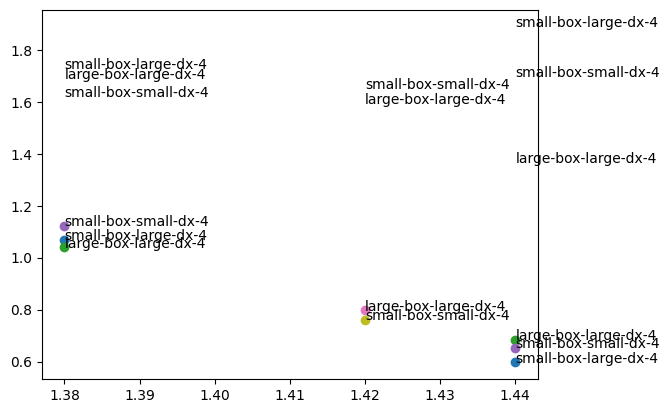

In [15]:
def plot_calculated_freqs(df):
    # df has columns eps_dd, sf_freq, lattice_freq, theory and label
    # iterate over the dataframe and plot the frequencies, with the text label next to the point


    for i, row in df.iterrows():
        plt.plot(row["eps_dd"], row["sf_freq"], "o")
        plt.plot(row["eps_dd"], row["lattice_freq"])
        plt.text(row["eps_dd"], row["sf_freq"], row["label"])
        plt.text(row["eps_dd"], row["lattice_freq"], row["label"])

plot_calculated_freqs(mf_frequencies)
    

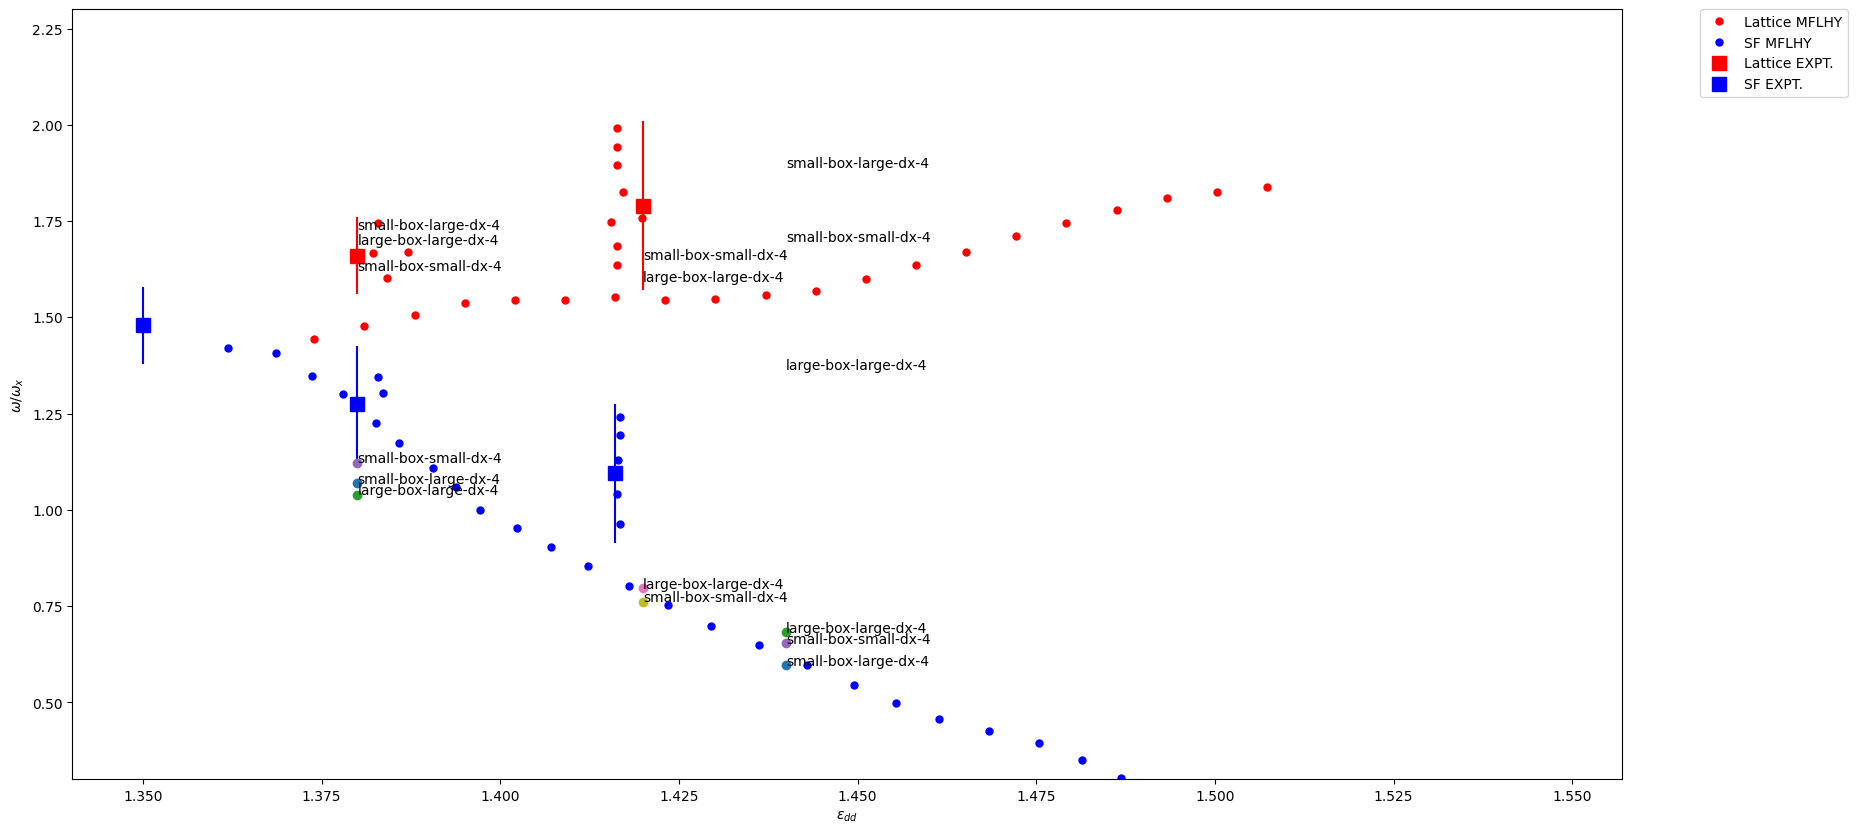

In [16]:

# Load the data
lattice_freq_expt = pd.read_csv("../digitalized-figures/digit_fig1_lattice_EXPT.csv")
sf_freq_expt = pd.read_csv("../digitalized-figures/digit_fig1_sf_EXPT.csv")

lattice_freq_mf = pd.read_csv("../digitalized-figures/digit_fig1_lattice.csv")
sf_freq_mf = pd.read_csv("../digitalized-figures/digit_fig1_sf.csv")

# Plot the digitalized data

plt.figure(figsize=(20, 10))

plt.errorbar(lattice_freq_expt["eps_dd"], 
             lattice_freq_expt["omega"], 
             lattice_freq_expt["omega_err"], 
             # put Box marker
             marker='s',
             # put marker size 5    
             markersize=10,
             ls='', label="Lattice EXPT.",
             color='red')

plt.errorbar(sf_freq_expt["eps_dd"], 
             sf_freq_expt["omega"], 
             sf_freq_expt["omega_err"], 
             # put Box marker
             marker='s',
             # put marker size 5    
             markersize=10,
             ls='', label="SF EXPT.",
             color='blue')

plt.plot(lattice_freq_mf["eps_dd"], 
         lattice_freq_mf["omega"], 
        # put circle marker
        marker='o',
        # put marker size 5    
        markersize=5,
        ls='', label="Lattice MFLHY",
        color='red')

plt.plot(sf_freq_mf["eps_dd"], 
         sf_freq_mf["omega"], 
        # put circle marker
        marker='o',
        # put marker size 5    
        markersize=5,
        ls='', label="SF MFLHY",
        color='blue')


plot_calculated_freqs(mf_frequencies)


plt.xlabel(r"$\epsilon_{dd}$")
plt.ylabel(r"$\omega/\omega_{x}$")

plt.ylim(0.3, 2.3)

# put legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)